<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A2.Creación de arbol de decisión y mejora con PCA.Datos Breast_Cancer_Wisconsin
</h1>


## Descripción:

En este ejemplo se muestra como usar PCA para mejorar la clasificación de un conjunto de datos

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [1]:
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(gmodels)){
    install.packages('gmodels',repos='http://cran.es.r-project.org')
    require(gmodels)
}
set.seed(606);

Loading required package: car
Loading required package: C50
Loading required package: gmodels
Warning message:
"package 'gmodels' was built under R version 3.3.2"

### Leer el conjunto de datos original desde su URL en el repositorio UCI Machine Learning

In [2]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",", header=FALSE)

### Obtener las dimensiones (N y d) del conjunto de datos

In [3]:
head(wdbc)
dim(wdbc)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


[1] 699  11

### Recodificar los '?' por NA y quedarse solo con los registros completos

In [4]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))

x=wdbc[complete.cases(wdbc),]


### Particionar el conjunto de entrada en dos (training y test set), según la regla del 2/3

In [5]:
N=dim(x)[1]
all=seq(1,N)

# seleccionar 2/3 al azar

train=sort(sample(N,N*2/3.0))
test=setdiff(all,train)

xtrain=x[train,]
xtest=x[test,]

In [6]:
### Revisar que haya una representación parecida variable clasificadora en el conjunto de entreno y test

In [7]:
prop.table(table(xtrain$V11))
prop.table(table(xtest$V11))


        2         4 
0.6549451 0.3450549 


        2         4 
0.6403509 0.3596491 

### Crear un primer árbol usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 9 

Tree size: 4 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Tue Nov 08 07:09:10 2016
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (10 attributes) from undefined.data

Decision tree:

V3 <= 2: 2 (284/7)
V3 > 2:
:...V7 > 1: 4 (151/8)
    V7 <= 1:
    :...V3 <= 5: 2 (14/1)
        V3 > 5: 4 (6)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4   16( 3.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   290     8    (a): class 2
	     8   149    (b): class 4


	Attribute usage:

	100.00%	V3
	 37.58%	V7


Time: 0.0 secs


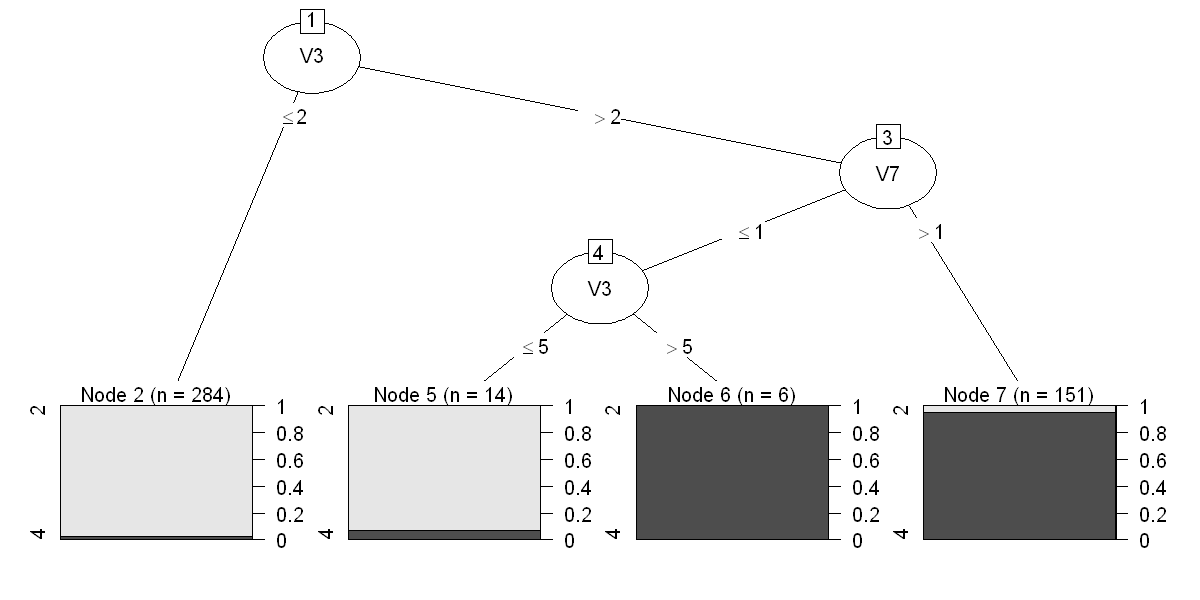

In [21]:
model1 <- C50::C5.0(xtrain[,c(2:10)],as.factor(xtrain$V11))
model1
summary(model1)
options(repr.plot.width=10, repr.plot.height=5)
plot(model1)

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [22]:
V11_pred <- predict(model1, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
             | predicted V11 
  actual V11 |         2 |         4 | Row Total | 
-------------|-----------|-----------|-----------|
           2 |       137 |         9 |       146 | 
             |     0.601 |     0.039 |           | 
-------------|-----------|-----------|-----------|
           4 |         7 |        75 |        82 | 
             |     0.031 |     0.329 |           | 
-------------|-----------|-----------|-----------|
Column Total |       144 |        84 |       228 | 
-------------|-----------|-----------|-----------|

 


###  El error del árbol es del 0,07. Solo 16 casos clasifican incorrectamente. Veamos si es mejorable con la técnica de PCA   

### Utilizar PCA para extraer características, analizando el número de componentes

In [8]:
TipoCancer <- xtrain[,11]
VarCancer <- xtrain[,2:10]

pcaVarCancer <- princomp(VarCancer)
summary(pcaVarCancer) 

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     6.4746658 2.01197518 1.82649418 1.78339929 1.64713254
Proportion of Variance 0.6813984 0.06579784 0.05422543 0.05169679 0.04409847
Cumulative Proportion  0.6813984 0.74719627 0.80142170 0.85311849 0.89721696
                           Comp.6     Comp.7     Comp.8     Comp.9
Standard deviation     1.57684976 1.31802125 1.20670075 0.80231038
Proportion of Variance 0.04041542 0.02823652 0.02366822 0.01046288
Cumulative Proportion  0.93763238 0.96586890 0.98953712 1.00000000

### Examinada la desviación estándard, la proporción de la varianza y varianza acumulada escogemos el primer componente para intentar mejorar nuestro modelo.

### Añadir una nueva variable C1 a los datos usando el primer componente calculado

In [9]:
xtrain$C1=predict(pcaVarCancer,xtrain[,2:11])[,1]
xtest$C1=predict(pcaVarCancer,xtest[,2:11])[,1]

### Crear un segundo árbol con la nueva variable usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 10 

Tree size: 2 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Tue Nov 08 07:09:10 2016
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (11 attributes) from undefined.data

Decision tree:

C1 <= 0.9780181: 4 (165/9)
C1 > 0.9780181: 2 (290/1)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2   10( 2.2%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   289     9    (a): class 2
	     1   156    (b): class 4


	Attribute usage:

	100.00%	C1


Time: 0.0 secs


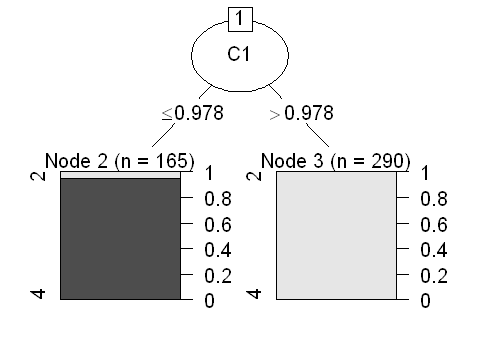

In [25]:
model2 <- C50::C5.0(xtrain[,c(2:10,12)],as.factor(xtrain$V11))
model2
summary(model2)
options(repr.plot.width=4, repr.plot.height=3)
plot(model2)

Observar que para la creación el árbol solo se ha usado la variable que corresponde con el componente 1. El resto de variables se ha descartado.

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [26]:
V11_pred <- predict(model2, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
             | predicted V11 
  actual V11 |         2 |         4 | Row Total | 
-------------|-----------|-----------|-----------|
           2 |       137 |         9 |       146 | 
             |     0.601 |     0.039 |           | 
-------------|-----------|-----------|-----------|
           4 |         0 |        82 |        82 | 
             |     0.000 |     0.360 |           | 
-------------|-----------|-----------|-----------|
Column Total |       137 |        91 |       228 | 
-------------|-----------|-----------|-----------|

 


### Tenemos una tasa del 0,039 de error en clasificación. Hemos logrado reducir las clasificaciones erroneas de tumor maligno a 0 manteniendose la misma tasa de falsos positivos.